<a href="https://colab.research.google.com/github/polleyamilya/AIComputerVision/blob/master/TomatoDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Feb 22 10:42:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:

#Give dataset path
train_path = '/content/drive/MyDrive/DISEASE/Dataset1/train'
test_path = '/content/drive/MyDrive/DISEASE/Dataset1/valid'

Working with 16449 images
Image examples: 
b801ed5c-9127-4ce5-b71f-5480620510cf___PSU_CG 2252_90deg.JPG


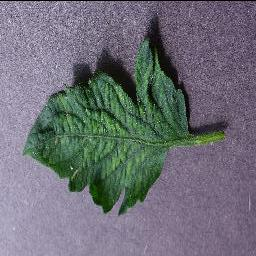

b9c75527-d6ee-4c24-b293-9618b378157c___PSU_CG 2130_90deg.JPG


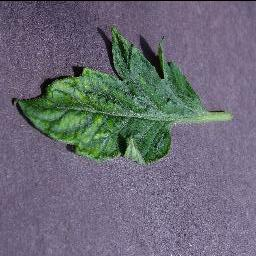

b801ed5c-9127-4ce5-b71f-5480620510cf___PSU_CG 2252_270deg.JPG


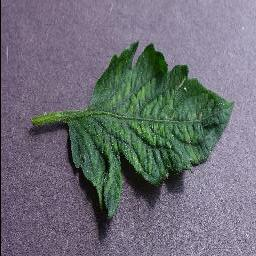

bba77afa-234e-40c9-9d2e-6770ac1789e4___PSU_CG 2082_180deg.JPG


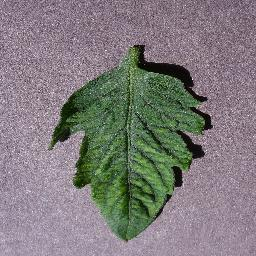

b801ed5c-9127-4ce5-b71f-5480620510cf___PSU_CG 2252_new30degFlipLR.JPG


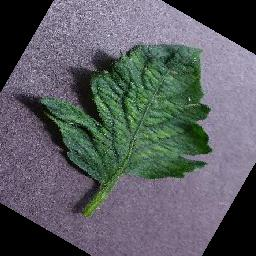

b8a9c9dd-fbba-41e2-b75d-7fd7f990cda0___PSU_CG 2185_new30degFlipLR.JPG


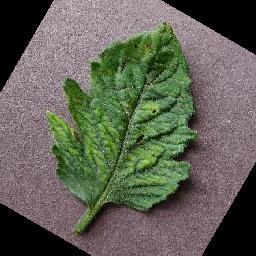

b8c1b55d-a4b9-4f84-9f0c-bd7d08a48f78___PSU_CG 2262_270deg.JPG


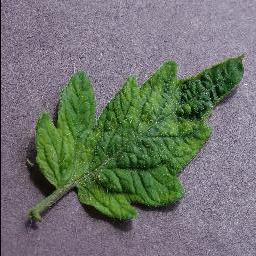

bd22aa4a-ea90-41af-862d-7e887eb57a00___PSU_CG 2416_180deg.JPG


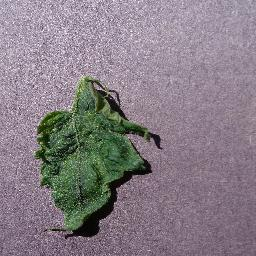

b8972ee2-b576-4fdd-bb69-f8c43b87471b___PSU_CG 2060_90deg.JPG


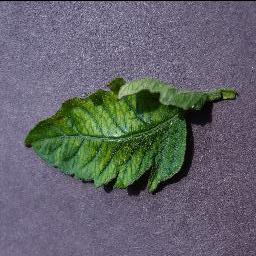

b8c1b55d-a4b9-4f84-9f0c-bd7d08a48f78___PSU_CG 2262.JPG


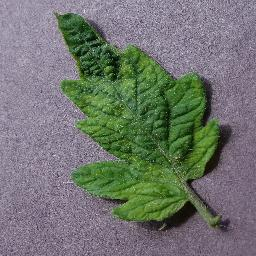

In [ ]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/Unhealthy'


onlyunhealthyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlyunhealthyfiles)))
print("Image examples: ")


for i in range(10):
    print(onlyunhealthyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyunhealthyfiles[i], width=240, height=240))

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:

folders = glob('/content/drive/MyDrive/DISEASE/Dataset1/train/*')
print(len(folders))

2


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:

train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18375 images belonging to 2 classes.


In [ ]:

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18345 images belonging to 2 classes.


In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
5/5 - 563s - loss: 2.1701 - accuracy: 0.8250 - val_loss: 1.4317 - val_accuracy: 0.8994

Epoch 00001: val_loss improved from inf to 1.43167, saving model to mymodel.h5
Epoch 2/10
5/5 - 549s - loss: 1.6515 - accuracy: 0.9062 - val_loss: 0.9645 - val_accuracy: 0.8994

Epoch 00002: val_loss improved from 1.43167 to 0.96455, saving model to mymodel.h5
Epoch 3/10
5/5 - 526s - loss: 0.8368 - accuracy: 0.9000 - val_loss: 0.7934 - val_accuracy: 0.9395

Epoch 00003: val_loss improved from 0.96455 to 0.79339, saving model to mymodel.h5
Epoch 4/10
5/5 - 478s - loss: 0.4408 - accuracy: 0.9438 - val_loss: 0.7311 - val_accuracy: 0.9424

Epoch 00004: val_loss improved from 0.79339 to 0.73108, saving model to mymodel.h5
Epoch 5/10
5/5 - 451s - loss: 0.5854 - accuracy: 0.9563 - val_loss: 0.5243 - val_accuracy: 0.9551

Epoch 00005: val_loss improved from 0.73108 to 0.52429, saving model to mymodel.h5
Epoch 6/10
5/5 - 454s - loss: 0.4862 - accuracy: 0.9563 - val_loss: 1.0377 - val_accuracy: 0.9

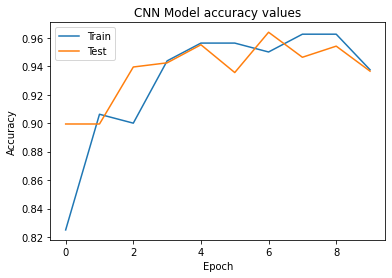

In [ ]:

_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()